In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1630


<Axes: xlabel='Time'>

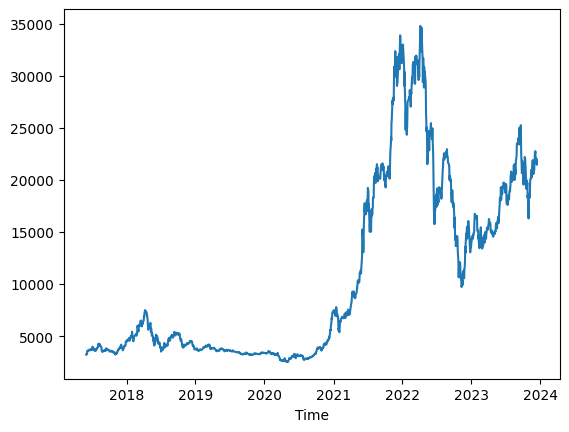

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
VND['Lag'] = np.arange(len(VND.index))
VND = VND[['Close', 'Lag']]
VND

VND = pd.DataFrame(VND)
VND.set_index("Lag", inplace= True)
VND

,Close
Lag,
0,3230
1,3280
2,3280
3,3320
4,3590
...,...
1625,21950
1626,22050
1627,21600


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(VND))
test_size = int(0.4 * len(VND))

train_data = VND[:train_size]
test_data = VND[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[4576.59031759],
       [4577.28590516],
       [4577.98149272],
       [4578.67708029],
       [4579.37266785],
       [4580.06825542],
       [4580.76384298],
       [4581.45943055],
       [4582.15501811],
       [4582.85060568],
       [4583.54619324],
       [4584.24178081],
       [4584.93736837],
       [4585.63295594],
       [4586.3285435 ],
       [4587.02413107],
       [4587.71971863],
       [4588.4153062 ],
       [4589.11089376],
       [4589.80648133],
       [4590.50206889],
       [4591.19765646],
       [4591.89324402],
       [4592.58883159],
       [4593.28441915],
       [4593.98000672],
       [4594.67559428],
       [4595.37118185],
       [4596.06676941],
       [4596.76235698],
       [4597.45794454],
       [4598.15353211],
       [4598.84911967],
       [4599.54470724],
       [4600.2402948 ],
       [4600.93588237],
       [4601.63146993],
       [4602.3270575 ],
       [4603.02264506],
       [4603.71823263],
       [4604.41382019],
       [4605.109

In [7]:
# 6. 60 days prediction
last_index =  VND.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[5030.11341   ]
 [5030.80899757]
 [5031.50458513]
 [5032.2001727 ]
 [5032.89576026]
 [5033.59134783]
 [5034.28693539]
 [5034.98252296]
 [5035.67811052]
 [5036.37369809]
 [5037.06928565]
 [5037.76487322]
 [5038.46046078]
 [5039.15604835]
 [5039.85163591]
 [5040.54722348]
 [5041.24281104]
 [5041.93839861]
 [5042.63398617]
 [5043.32957374]
 [5044.0251613 ]
 [5044.72074887]
 [5045.41633643]
 [5046.111924  ]
 [5046.80751156]
 [5047.50309913]
 [5048.19868669]
 [5048.89427426]
 [5049.58986182]
 [5050.28544939]
 [5050.98103695]
 [5051.67662452]
 [5052.37221208]
 [5053.06779965]
 [5053.76338722]
 [5054.45897478]
 [5055.15456235]
 [5055.85014991]
 [5056.54573748]
 [5057.24132504]
 [5057.93691261]
 [5058.63250017]
 [5059.32808774]
 [5060.0236753 ]
 [5060.71926287]
 [5061.41485043]
 [5062.110438  ]
 [5062.80602556]
 [5063.50161313]
 [5064.19720069]
 [5064.89278826]
 [5065.58837582]
 [5066.28396339]
 [5066.97955095]
 [5067.67513852]
 [5068.37072608]
 

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 16611.55908725105
Testing MAPE: 74.36415879374324
Testing MAE: 15540.489795016054
MSLR:  2.0543777449055654


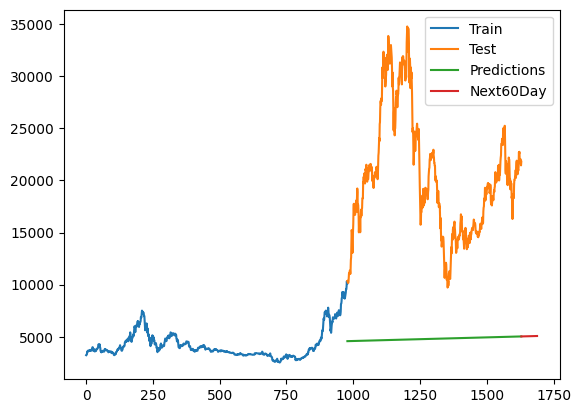

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()